<a href="https://colab.research.google.com/github/Eskerluminous/Heart_Disease-Dataset-Classification/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **-----------Import Libraries------------**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
import yellowbrick
import seaborn as sns
import pickle
from matplotlib.collections import PathCollection
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# ----------Read Dataset-----------

In [3]:
df = pd.read_csv("/content/HeartDisease.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
print(' Dataset Info :-')
print('----' * 4)
print('Total Rows:', df.shape[0])
print('Total Columns:', df.shape[1])
print('\n')
print('Dataset Details :-')
print('---' * 5)
df.isnull().sum()

 Dataset Info :-
----------------
Total Rows: 303
Total Columns: 14


Dataset Details :-
---------------


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

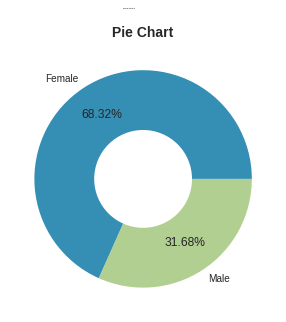

In [44]:
labels=['Female', 'Male']
order=df['sex'].value_counts().index
plt.figure(figsize=(16, 5))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='1', fontfamily='sans-serif')
# plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14)
plt.pie(df['sex'].value_counts(), labels=labels,pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

Heart Diseases Status (target) Total :-
-------------------------------------


1    165
0    138
Name: target, dtype: int64

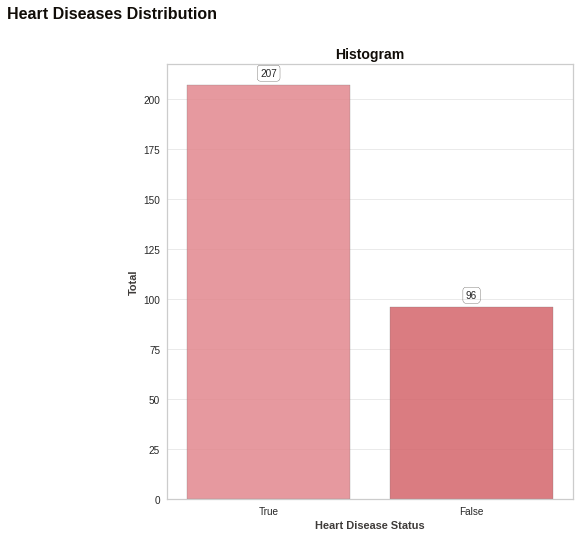

In [ ]:
from sklearn.preprocessing import MinMaxScaler


colors=color_mix[3:5]

labels=['True', 'False']
order=df['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='sex', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=8, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt



print('Heart Diseases Status (target) Total :-')
print('-' * 37)
df.target.value_counts(dropna=False)




# ---------Test(20%) and Train(80%) Data split-------------

In [ ]:
# --- Splitting Dataset into 80:20 ---
x = df.drop(['target'], axis=1)
y = df['target']
x = MinMaxScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# **----------K fold cross validation-------------**

In [ ]:
from statistics import stdev
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
rf = RandomForestClassifier(n_estimators=50, random_state=13)
kf = KFold(n_splits=5, shuffle=False)
score = cross_val_score(rf, x_train, y_train, cv=kf, scoring='recall')
score = cross_val_score(rf, x_train, y_train, cv=kf, scoring='recall')
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', rf_cv_score)
print('Cross Validation Recall standard deviation: ', rf_cv_stdev)

Cross Validation Recall scores are: [0.62962963 0.96551724 0.76       0.81818182 0.88461538]
Average Cross Validation Recall score:  0.8115888147612285
Cross Validation Recall standard deviation:  0.12731934160027483


# **-------------- Nayeb Bayes Classification------------**

In [ ]:
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

Naive Bayes Accuracy:86.89% .


0.8688524590163934

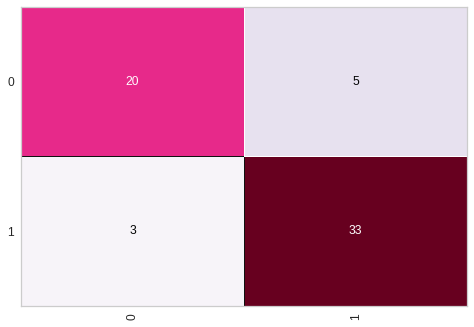

In [ ]:
# --- GNB Accuracy ---
from yellowbrick.classifier import ConfusionMatrix
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('Naive Bayes Accuracy:'+'{:.2f}%'.format(GNBAcc*100)+' .')
f, ax1 = plt.subplots()
# # --- GNB Confusion Matrix ---
gnbmatrix = ConfusionMatrix(GNBclassifier, ax=ax1, cmap='PuRd',
                            title='Gaussian Naive Bayes Confusion Matrix')
gnbmatrix.fit(x_train, y_train)
gnbmatrix.score(x_test, y_test)


# **------------Random Forest Classification----------------**

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

Random Forest Accuracy: 91.80%


0.9180327868852459

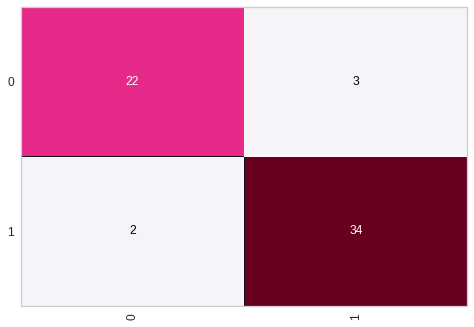

In [ ]:
RFAcc = accuracy_score(y_pred_RF, y_test)
print('Random Forest Accuracy:'+' {:.2f}%'.format(RFAcc*100)+'')

# --- Random Forest Confusion Matrix ---
f, ax1 = plt.subplots()
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)


## --------Compare Both Model-------

In [ ]:
# --- Create Accuracy Comparison Table ---
print('Compare Random forest & Naive Bayes model:')
print('-' * 41)
compare = pd.DataFrame({'Model': ['Naive Bayes', 'Random Forest'], 
                        'Accuracy': [GNBAcc*100,RFAcc*100]})


compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Compare Random forest & Naive Bayes model:
-----------------------------------------


Model,Accuracy
Random Forest,91.803279
Naive Bayes,86.885246
